<a href="https://colab.research.google.com/github/JorgeDanilo/Data_Science/blob/master/tratamento_enem_estado_goias_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE ESTATÍSTICA DO ENEM 2021 DO ESTADO DE GOIÁS**

Este projeto analisa os resultados do ENEM no estado de Goias do ano de 2021.

Os dados foram extraídos do site do INEP:

http://inep.gov.br/microdados

In [3]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2021.csv',
                    sep=';', encoding='iso-8859-1')

## Extração e Limpeza dos dados

In [8]:
pd.options.display.max_columns = 44

In [10]:
go = dados.loc[dados.SG_UF_PROVA == 'GO']
go.head()

NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
10  210052320506    2021                5       F                1   
17  210051519039    2021                8       M                1   
23  210052655126    2021                3       F                1   
72  210052997238    2021                3       F                1   
77  210054156267    2021                5       F                1   

    TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
10            3                 1                1                2   
17            3                 1                1                6   
23            3                 2                2                0   
72            3                 1                1                1   
77            3                 1                2                0   

    TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_MUNICIPIO_ESC NO_MUNICIPIO_ESC  \
10          1        NaN             0               NaN              NaN   
17          1        NaN             0               NaN              NaN   
23          2        1.0             0               NaN              NaN   
72          1        NaN             0               NaN              NaN   
77          2        1.0             0               NaN              NaN   

    CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
10        NaN       NaN                     NaN                 NaN   
17        NaN       NaN                     NaN                 NaN   
23        NaN       NaN                     NaN                 NaN   
72        NaN       NaN                     NaN                 NaN   
77        NaN       NaN                     NaN                 NaN   

    TP_SIT_FUNC_ESC  CO_MUNICIPIO_PROVA   NO_MUNICIPIO_PROVA  CO_UF_PROVA  \
10              NaN             5208707              Goiânia           52   
17              NaN             5214606          Niquelândia           52   
23              NaN             5208608            Goianésia           52   
72              NaN             5208707              Goiânia           52   
77              NaN             5221858  Valparaíso de Goiás           52   

    ... Q004  Q005  Q006  Q007  Q008  Q009  Q010  Q011  Q012  Q013  Q014  \
10  ...    D   2.0     B     A     B     C     A     A     B     A     B   
17  ...    A   3.0     D     A     B     D     B     A     B     A     B   
23  ...    A   5.0     C     A     B     D     B     C     B     B     B   
72  ...    B   3.0     D     A     C     D     A     A     B     A     B   
77  ...    B   4.0     B     A     B     C     B     A     B     B     B   

    Q015  Q016 Q017 Q018 Q019 Q020  Q021 Q022 Q023 Q024 Q025  
10     A     A    A    A    B    A     A    C    A    B    B  
17     A     A    A    A    B    A     A    C    A    B    B  
23     A     A    A    A    B    A     A    E    A    A    B  
72     A     A    A    A    B    B     A    D    A    A    B  
77     A     A    A    A    B    A     A    D    A    B    B  

[5 rows x 76 columns]

In [11]:
enem_goias = go.drop(columns=['Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012' , 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',])

In [12]:
enem_goias = enem_goias.drop(columns=['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT'])

In [13]:
enem_goias = enem_goias.drop(columns=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'])

In [14]:
enem_goias = enem_goias.drop(columns=['Q001', 'Q002', 'Q003', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC'])

In [16]:
enem_goias = enem_goias.rename(columns={'NU_NOTA_REDACAO': 'NOTA_REDACAO'})

In [17]:
enem_goias = enem_goias.rename(columns={'NU_NOTA_CN': 'NOTA_CN','NU_NOTA_CH': 'NOTA_CH',
                                'NU_NOTA_LC': 'NOTA_LC','NU_NOTA_MT': 'NOTA_MT'})

In [18]:
enem_goias = enem_goias.rename(columns={'NU_NOTA_COMP1': 'COMP1','NU_NOTA_COMP2': 'COMP2',
                                'NU_NOTA_COMP3': 'COMP3','NU_NOTA_COMP4': 'COMP4',
                                'NU_NOTA_COMP5':'COMP5'})   

In [19]:
enem_goias = enem_goias.rename(columns={'NU_IDADE': 'IDADE','TP_SEXO': 'SEXO',
                                'TP_COR_RACA': 'RACA','Q025': 'INTERNET',
                                'TP_ESCOLA':'ESCOLA'})

In [20]:
enem_goias.head()

TP_FAIXA_ETARIA SEXO  TP_ESTADO_CIVIL  RACA  TP_NACIONALIDADE  \
10                5    F                1     3                 1   
17                8    M                1     3                 1   
23                3    F                1     3                 2   
72                3    F                1     3                 1   
77                5    F                1     3                 1   

    TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  ESCOLA  TP_ENSINO  IN_TREINEIRO  \
10                1                2       1        NaN             0   
17                1                6       1        NaN             0   
23                2                0       2        1.0             0   
72                1                1       1        NaN             0   
77                2                0       2        1.0             0   

   SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
10       NaN                     NaN                 NaN              NaN   
17       NaN                     NaN                 NaN              NaN   
23       NaN                     NaN                 NaN              NaN   
72       NaN                     NaN                 NaN              NaN   
77       NaN                     NaN                 NaN              NaN   

    CO_MUNICIPIO_PROVA   NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  \
10             5208707              Goiânia           52          GO   
17             5214606          Niquelândia           52          GO   
23             5208608            Goianésia           52          GO   
72             5208707              Goiânia           52          GO   
77             5221858  Valparaíso de Goiás           52          GO   

    TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
10               1               1               1               1   
17               1               1               1               1   
23               0               0               0               0   
72               0               0               0               0   
77               1               1               1               1   

    CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NOTA_CN  NOTA_CH  \
10        909.0        881.0        892.0        899.0    650.9    617.9   
17        910.0        879.0        889.0        900.0    516.3    524.3   
23          NaN          NaN          NaN          NaN      NaN      NaN   
72          NaN          NaN          NaN          NaN      NaN      NaN   
77        909.0        881.0        892.0        899.0    430.6    475.8   

    NOTA_LC  NOTA_MT  TP_LINGUA  TP_STATUS_REDACAO  COMP1  COMP2  COMP3  \
10    631.7    796.7          0                1.0  180.0  200.0  200.0   
17    496.3    608.5          1                1.0  120.0  200.0  180.0   
23      NaN      NaN          0                NaN    NaN    NaN    NaN   
72      NaN      NaN          0                NaN    NaN    NaN    NaN   
77    365.1    432.2          1                1.0   80.0  120.0   80.0   

    COMP4  COMP5  NOTA_REDACAO INTERNET  
10  200.0  200.0         980.0        B  
17  200.0  180.0         880.0        B  
23    NaN    NaN           NaN        B  
72    NaN    NaN           NaN        B  
77  120.0  120.0         520.0        B

Renomeando Registros (Linhas)

In [21]:
enem_goias["RACA"] = enem_goias["RACA"].replace({0: "nao_declarado", 1: "branca", 2: "preta", 3: "parda", 4: "amarela", 5: "indigena"})

In [22]:
enem_goias.head(20)

TP_FAIXA_ETARIA SEXO  TP_ESTADO_CIVIL    RACA  TP_NACIONALIDADE  \
10                 5    F                1   parda                 1   
17                 8    M                1   parda                 1   
23                 3    F                1   parda                 2   
72                 3    F                1   parda                 1   
77                 5    F                1   parda                 1   
91                 3    M                1  branca                 1   
99                 2    F                1   parda                 1   
113                3    F                1  branca                 1   
131                3    M                1   parda                 2   
146                3    F                1   parda                 1   
175                3    M                1  branca                 1   
208                7    F                1  branca                 1   
214                3    M                1  branca                 1   
216                4    F                1   preta                 1   
231                3    F                1   parda                 1   
232                3    F                1   parda                 1   
243                3    F                1  branca                 1   
244                4    F                1  branca                 1   
273                3    F                1   parda                 1   
274                2    F                1   parda                 1   

     TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  ESCOLA  TP_ENSINO  IN_TREINEIRO  \
10                 1                2       1        NaN             0   
17                 1                6       1        NaN             0   
23                 2                0       2        1.0             0   
72                 1                1       1        NaN             0   
77                 2                0       2        1.0             0   
91                 2                0       2        1.0             0   
99                 2                0       2        NaN             0   
113                2                0       2        1.0             0   
131                2                0       2        1.0             0   
146                2                0       2        1.0             0   
175                2                0       2        1.0             0   
208                1                4       1        NaN             0   
214                2                0       2        1.0             0   
216                2                0       2        1.0             0   
231                2                0       2        NaN             0   
232                2                0       2        1.0             0   
243                2                0       2        1.0             0   
244                1                2       1        NaN             0   
273                1                0       1        NaN             0   
274                2                0       2        1.0             0   

    SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
10        NaN                     NaN                 NaN              NaN   
17        NaN                     NaN                 NaN              NaN   
23        NaN                     NaN                 NaN              NaN   
72        NaN                     NaN                 NaN              NaN   
77        NaN                     NaN                 NaN              NaN   
91        NaN                     NaN                 NaN              NaN   
99        NaN                     NaN                 NaN              NaN   
113       NaN                     NaN                 NaN              NaN   
131       NaN                     NaN                 NaN              NaN   
146        GO                     4.0                 1.0              1.0   
175       NaN                     NaN                 NaN              NaN   
2

In [23]:
enem_goias["TP_LINGUA"] = enem_goias["TP_LINGUA"].replace({0: "Inglês", 1: "Espanhol"})
enem_goias["ESCOLA"] = enem_goias["ESCOLA"].replace({1: "não_respondeu", 2: "pública", 3: "privada", 4: "exterior"})
enem_goias["INTERNET"] = enem_goias["INTERNET"].replace({"A": "Não", "B": "Sim"})

In [231]:
#Estado Civil

# 0 -> Não informado
# 1 -> Solteiro (a)
# 2 -> Casado (a)/Mora com companheiro (a)
# 3 -> Divorciado (a) / Desquitado (a) / Separado (a)
# 4 -> Viúvo (a)

enem_goias["TP_ESTADO_CIVIL"] = enem_goias["TP_ESTADO_CIVIL"].replace({0: "Não Informado", 1: "Solteiro(a)", 2: "Casado(a)/ Mora com companheiro(a)", 
                                                                                               3: "Divorciado (a) / Desquitado (a) / Separado (a)", 4: "Viúvo (a)"})

In [240]:
enem_goias['TP_ANO_CONCLUIU'] = enem_goias['TP_ANO_CONCLUIU'].replace({
    0: "Não Informado", 1: "2020", 2: "2019", 3: "2018", 4: "2017", 5: "2016", 
    6: "2015", 7: "2014", 8: "2013", 9: "2012", 10: "2011", 11: "2010", 12:"2009",
     13: "2008", 14: "2007", 15: "Antes de 2007"
})

In [242]:
enem_goias.head()

FAIXA_ETARIA SEXO TP_ESTADO_CIVIL    RACA  TP_NACIONALIDADE  \
10       20_ANOS    F     Solteiro(a)   parda                 1   
17       23_ANOS    M     Solteiro(a)   parda                 1   
77       20_ANOS    F     Solteiro(a)   parda                 1   
99       17_ANOS    F     Solteiro(a)   parda                 1   
113      18_ANOS    F     Solteiro(a)  branca                 1   

     TP_ST_CONCLUSAO TP_ANO_CONCLUIU         ESCOLA  TP_ENSINO  IN_TREINEIRO  \
10                 1            2019  não_respondeu        NaN             0   
17                 1            2015  não_respondeu        NaN             0   
77                 2   Não Informado        pública        1.0             0   
99                 2   Não Informado        pública        NaN             0   
113                2   Não Informado        pública        1.0             0   

    SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
10        NaN                     NaN                 NaN              NaN   
17        NaN                     NaN                 NaN              NaN   
77        NaN                     NaN                 NaN              NaN   
99        NaN                     NaN                 NaN              NaN   
113       NaN                     NaN                 NaN              NaN   

     CO_MUNICIPIO_PROVA   NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  \
10              5208707              Goiânia           52          GO   
17              5214606          Niquelândia           52          GO   
77              5221858  Valparaíso de Goiás           52          GO   
99              5211800              Jaraguá           52          GO   
113             5208707              Goiânia           52          GO   

     TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
10                1               1               1               1   
17                1               1               1               1   
77                1               1               1               1   
99                1               1               1               1   
113               1               1               1               1   

     CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NOTA_CN  NOTA_CH  \
10         909.0        881.0        892.0        899.0    650.9    617.9   
17         910.0        879.0        889.0        900.0    516.3    524.3   
77         909.0        881.0        892.0        899.0    430.6    475.8   
99         911.0        880.0        890.0        902.0    424.0    380.1   
113        911.0        880.0        890.0        902.0    429.8    514.1   

     NOTA_LC  NOTA_MT TP_LINGUA  TP_STATUS_REDACAO  COMP1  COMP2  COMP3  \
10     631.7    796.7    Inglês                1.0  180.0  200.0  200.0   
17     496.3    608.5  Espanhol                1.0  120.0  200.0  180.0   
77     365.1    432.2  Espanhol                1.0   80.0  120.0   80.0   
99     474.0    423.3  Espanhol                1.0  100.0  120.0  100.0   
113    510.5    394.3  Espanhol                1.0  120.0  120.0  120.0   

     COMP4  COMP5  NOTA_REDACAO INTERNET  
10   200.0  200.0         980.0      Sim  
17   200.0  180.0         880.0      Sim  
77   120.0  120.0         520.0      Sim  
99   120.0   40.0         480.0      Sim  
113  120.0  140.0         620.0      Sim

In [88]:
enem_goias['NOTA_REDACAO'].isnull().sum()

47360

In [90]:
enem_goias.dropna(subset=['NOTA_REDACAO'], inplace=True)

In [91]:
enem_goias['NOTA_REDACAO'].isnull().sum()

0

## Análise Exploratória e Transformação dos dados

In [25]:
enem_goias["TP_FAIXA_ETARIA"].value_counts()

enem_goias = enem_goias.rename(columns={'TP_FAIXA_ETARIA': 'FAIXA_ETARIA'})

In [92]:
enem_goias["FAIXA_ETARIA"] = enem_goias["FAIXA_ETARIA"].replace({
    1: "MENOR_17_ANOS",
    2: "17_ANOS",
    3: "18_ANOS",
    4: "19_ANOS",
    5: "20_ANOS",
    6: "21_ANOS",
    7: "22_ANOS",
    8: "23_ANOS",
    9: "24_ANOS",
    10: "25_ANOS",
    11: "ENTRE_26_E_30_ANOS",
    12: "ENTRE_31_E_35_ANOS",
    13: "ENTRE_36_E_40_ANOS",
    14: "ENTRE_41_E_45_ANOS",
    15: "ENTRE_46_E_50_ANOS",
    16: "ENTRE_51_E_55_ANOS",
    17: "ENTRE_56_E_60_ANOS",
    18: "ENTRE_61_E_65_ANOS",
    19: "ENTRE_66_E_70_ANOS",
    20: "MAIOR_DE_70_ANOS"
})

Análise das Idades

In [96]:
enem_goias["FAIXA_ETARIA"].value_counts()

18_ANOS               23963
17_ANOS               23955
MENOR_17_ANOS         12435
19_ANOS                9271
20_ANOS                4573
ENTRE_26_E_30_ANOS     2840
21_ANOS                2778
22_ANOS                1935
ENTRE_31_E_35_ANOS     1550
23_ANOS                1385
ENTRE_36_E_40_ANOS     1163
24_ANOS                1146
25_ANOS                 916
ENTRE_41_E_45_ANOS      759
ENTRE_46_E_50_ANOS      473
ENTRE_51_E_55_ANOS      228
ENTRE_56_E_60_ANOS      115
ENTRE_61_E_65_ANOS       48
ENTRE_66_E_70_ANOS       17
MAIOR_DE_70_ANOS          5
Name: FAIXA_ETARIA, dtype: int64

In [97]:
enem_goias["FAIXA_ETARIA"].value_counts().sort_index()

17_ANOS               23955
18_ANOS               23963
19_ANOS                9271
20_ANOS                4573
21_ANOS                2778
22_ANOS                1935
23_ANOS                1385
24_ANOS                1146
25_ANOS                 916
ENTRE_26_E_30_ANOS     2840
ENTRE_31_E_35_ANOS     1550
ENTRE_36_E_40_ANOS     1163
ENTRE_41_E_45_ANOS      759
ENTRE_46_E_50_ANOS      473
ENTRE_51_E_55_ANOS      228
ENTRE_56_E_60_ANOS      115
ENTRE_61_E_65_ANOS       48
ENTRE_66_E_70_ANOS       17
MAIOR_DE_70_ANOS          5
MENOR_17_ANOS         12435
Name: FAIXA_ETARIA, dtype: int64

In [98]:
idade = pd.DataFrame(enem_goias["FAIXA_ETARIA"].value_counts().sort_index())

In [99]:
pd.set_option('display.max_rows', 80)

In [100]:
idade.head(80)

FAIXA_ETARIA
17_ANOS                    23955
18_ANOS                    23963
19_ANOS                     9271
20_ANOS                     4573
21_ANOS                     2778
22_ANOS                     1935
23_ANOS                     1385
24_ANOS                     1146
25_ANOS                      916
ENTRE_26_E_30_ANOS          2840
ENTRE_31_E_35_ANOS          1550
ENTRE_36_E_40_ANOS          1163
ENTRE_41_E_45_ANOS           759
ENTRE_46_E_50_ANOS           473
ENTRE_51_E_55_ANOS           228
ENTRE_56_E_60_ANOS           115
ENTRE_61_E_65_ANOS            48
ENTRE_66_E_70_ANOS            17
MAIOR_DE_70_ANOS               5
MENOR_17_ANOS              12435

In [101]:
enem_goias.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts()

1    18621
Name: IN_TREINEIRO, dtype: int64

In [102]:
enem_goias.query('IN_TREINEIRO == 0')['IN_TREINEIRO'].value_counts()

0    70934
Name: IN_TREINEIRO, dtype: int64

In [103]:
treineiros = enem_goias.loc[enem_goias.IN_TREINEIRO == 1]

In [104]:
vestibulandos = enem_goias.loc[enem_goias.IN_TREINEIRO == 0]

In [105]:
vestibulandos.head()

FAIXA_ETARIA SEXO  TP_ESTADO_CIVIL    RACA  TP_NACIONALIDADE  \
10       20_ANOS    F                1   parda                 1   
17       23_ANOS    M                1   parda                 1   
77       20_ANOS    F                1   parda                 1   
99       17_ANOS    F                1   parda                 1   
113      18_ANOS    F                1  branca                 1   

     TP_ST_CONCLUSAO  TP_ANO_CONCLUIU         ESCOLA  TP_ENSINO  IN_TREINEIRO  \
10                 1                2  não_respondeu        NaN             0   
17                 1                6  não_respondeu        NaN             0   
77                 2                0        pública        1.0             0   
99                 2                0        pública        NaN             0   
113                2                0        pública        1.0             0   

    SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
10        NaN                     NaN                 NaN              NaN   
17        NaN                     NaN                 NaN              NaN   
77        NaN                     NaN                 NaN              NaN   
99        NaN                     NaN                 NaN              NaN   
113       NaN                     NaN                 NaN              NaN   

     CO_MUNICIPIO_PROVA   NO_MUNICIPIO_PROVA  CO_UF_PROVA SG_UF_PROVA  \
10              5208707              Goiânia           52          GO   
17              5214606          Niquelândia           52          GO   
77              5221858  Valparaíso de Goiás           52          GO   
99              5211800              Jaraguá           52          GO   
113             5208707              Goiânia           52          GO   

     TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
10                1               1               1               1   
17                1               1               1               1   
77                1               1               1               1   
99                1               1               1               1   
113               1               1               1               1   

     CO_PROVA_CN  CO_PROVA_CH  CO_PROVA_LC  CO_PROVA_MT  NOTA_CN  NOTA_CH  \
10         909.0        881.0        892.0        899.0    650.9    617.9   
17         910.0        879.0        889.0        900.0    516.3    524.3   
77         909.0        881.0        892.0        899.0    430.6    475.8   
99         911.0        880.0        890.0        902.0    424.0    380.1   
113        911.0        880.0        890.0        902.0    429.8    514.1   

     NOTA_LC  NOTA_MT TP_LINGUA  TP_STATUS_REDACAO  COMP1  COMP2  COMP3  \
10     631.7    796.7    Inglês                1.0  180.0  200.0  200.0   
17     496.3    608.5  Espanhol                1.0  120.0  200.0  180.0   
77     365.1    432.2  Espanhol                1.0   80.0  120.0   80.0   
99     474.0    423.3  Espanhol                1.0  100.0  120.0  100.0   
113    510.5    394.3  Espanhol                1.0  120.0  120.0  120.0   

     COMP4  COMP5  NOTA_REDACAO INTERNET  
10   200.0  200.0         980.0      Sim  
17   200.0  180.0         880.0      Sim  
77   120.0  120.0         520.0      Sim  
99   120.0   40.0         480.0      Sim  
113  120.0  140.0         620.0      Sim

## Analisando as presenças

0 -=> falta

1 => presente

2 -=> eliminado

In [106]:
vestibulandos['TP_PRESENCA_CH'].value_counts()

1    70934
Name: TP_PRESENCA_CH, dtype: int64

In [107]:
vestibulandos['TP_PRESENCA_LC'].value_counts()

1    70934
Name: TP_PRESENCA_LC, dtype: int64

In [108]:
vestibulandos['TP_STATUS_REDACAO'].value_counts().sort_index()

1.0    68652
2.0       75
3.0      168
4.0     1021
6.0      740
7.0       90
8.0      120
9.0       68
Name: TP_STATUS_REDACAO, dtype: int64

In [109]:
vestibulandos['TP_PRESENCA_CN'].value_counts()

1    66528
0     4363
2       43
Name: TP_PRESENCA_CN, dtype: int64

In [110]:
vestibulandos['TP_PRESENCA_MT'].value_counts()

1    66528
0     4363
2       43
Name: TP_PRESENCA_MT, dtype: int64

In [111]:
vestibulandos['NOTA_REDACAO'].isnull().sum()

0

In [112]:
provas = ['NOTA_REDACAO', 'NOTA_CN', 'NOTA_MT', 'NOTA_LC', 'NOTA_CH']

In [113]:
vestibulandos_classificados = vestibulandos.loc[vestibulandos.TP_PRESENCA_CH == 1]
vestibulandos_classificados = vestibulandos_classificados.loc[vestibulandos_classificados.TP_PRESENCA_MT == 1]

In [114]:
vestibulandos_classificados['TP_PRESENCA_MT'].value_counts()

1    66528
Name: TP_PRESENCA_MT, dtype: int64

In [115]:
vestibulandos_classificados[provas].isnull().sum()

NOTA_REDACAO    0
NOTA_CN         0
NOTA_MT         0
NOTA_LC         0
NOTA_CH         0
dtype: int64

## Notas Zero na Redação

In [116]:
from collections import Counter
dict(Counter(vestibulandos_classificados['NOTA_REDACAO']))

{980.0: 203,
 880.0: 1962,
 520.0: 3043,
 480.0: 2369,
 620.0: 3036,
 460.0: 1895,
 380.0: 775,
 740.0: 1460,
 580.0: 3770,
 560.0: 4133,
 680.0: 2260,
 920.0: 1916,
 540.0: 3268,
 840.0: 1733,
 600.0: 3995,
 820.0: 1448,
 860.0: 1523,
 900.0: 1717,
 700.0: 1787,
 940.0: 1319,
 640.0: 2944,
 500.0: 2311,
 420.0: 1240,
 340.0: 408,
 400.0: 1178,
 0.0: 1595,
 720.0: 1887,
 660.0: 2167,
 440.0: 1850,
 280.0: 152,
 780.0: 1442,
 760.0: 1781,
 800.0: 1725,
 360.0: 793,
 960.0: 680,
 300.0: 197,
 320.0: 338,
 260.0: 96,
 240.0: 54,
 200.0: 14,
 120.0: 2,
 140.0: 4,
 220.0: 29,
 80.0: 5,
 180.0: 10,
 160.0: 6,
 100.0: 3,
 1000.0: 1,
 40.0: 2,
 60.0: 2}

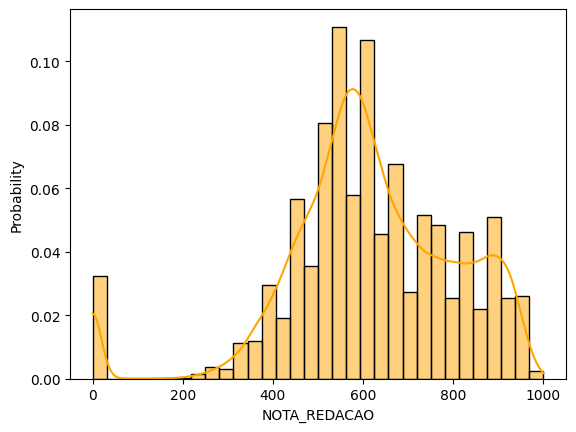

In [117]:
import seaborn as sns

sns.histplot(enem_goias, x='NOTA_REDACAO', bins=32, color='orange', kde=True, stat='probability');

In [118]:
import scipy.stats as stats
import matplotlib.pyplot as plt

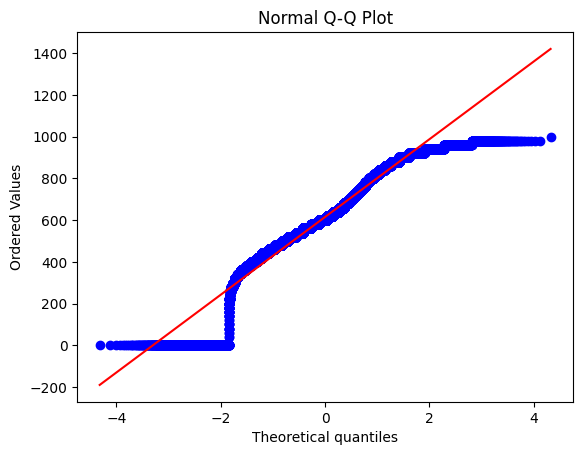

In [119]:
stats.probplot(enem_goias['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

In [124]:
import plotly.express as px

In [125]:
grafico = px.histogram(enem_goias, x = 'FAIXA_ETARIA', y="NOTA_REDACAO", nbins=15)
grafico.update_layout(width=400, height=400, title_text="Notas redacao - Enem GO 2021")
grafico.show()

### Analisando Outliers das Notas de Redação do Estado de Goiás

In [126]:
grafico = px.box(enem_goias, x='FAIXA_ETARIA', y="NOTA_REDACAO")
grafico.show()

## Histogramas da Nota de Redaçao do Estado de GO, relacionado a alguns atributos,como Sexo, Raça, Tipo Escola, Faixa etária.

In [164]:
grafico = px.histogram(enem_goias, x='NOTA_REDACAO', nbins=15, color='FAIXA_ETARIA', histnorm='percent',)
grafico.update_layout(width=800, height=800, title_text='Notas de Redação por Idade - Goiás 2021')
grafico.show()

In [138]:
grafico =  px.histogram (enem_goias,  x = "NOTA_MT", nbins=20, color='SEXO') 
grafico.update_layout(width=500,height=500,title_text='Notas de Matemática por sexo - Enem GO 2021') 
grafico.show()

In [143]:
grafico = px.histogram(enem_goias, x='NOTA_REDACAO', nbins=20, color='RACA',histnorm='percent')
grafico.update_layout(width=800, height=800, title_text='Notas de Redacao por Raça - Goias 2021')
grafico.show()

In [145]:
grafico = px.histogram(enem_goias, x='NOTA_REDACAO', nbins=20, color='INTERNET',histnorm='percent')
grafico.update_layout(width=800, height=800, title_text='Notas de Redacao dos Participantes que tem Internet - Goias 2021')
grafico.show()

In [169]:
grafico = px.histogram(enem_goias, x='NOTA_REDACAO', nbins=20, color='ESCOLA',histnorm='percent')
grafico.update_layout(width=800, height=800, title_text='Notas de Redacao por Tipo Escola - Goias 2021')
grafico.show()

## Análise estratificada da Cidade de *Aparecida de Goiânia*

In [243]:
enem_aparecida_goiania = enem_goias.loc[enem_goias.NO_MUNICIPIO_PROVA == 'Aparecida de Goiânia']

In [ ]:
grafico = px.histogram(enem_aparecida_goiania, x='NOTA_REDACAO', nbins=20, color='ESCOLA',histnorm='percent')
grafico.update_layout(width=800, height=800, title_text='Notas de Redacao por Tipo Escola - Apº de Goiania 2021')
grafico.show()

In [196]:
def show_histogram(data_frame, x, color:None, title:None, nbisn=10, histnorm='percent'):
  grafico = px.histogram(data_frame, x, nbins=nbisn, color=color, histnorm=histnorm)
  grafico.update_layout(width=500, height=500)
  grafico.show()


In [197]:
show_histogram(data_frame=enem_aparecida_goiania, x='NOTA_REDACAO', color='SEXO', title='Notas de Redação por Sexo')

In [236]:
show_histogram(data_frame=enem_aparecida_goiania, x='NOTA_REDACAO', color='TP_ESTADO_CIVIL', title='Notas de Redação Por Estado Civil')

In [246]:
show_histogram(data_frame=enem_aparecida_goiania, x='NOTA_REDACAO', color='TP_ANO_CONCLUIU', title="Nota de Redação Por Ano de Conclusão do Ensino Médio")